# Recycling Effectiveness in MA

### *Part 4: Assessing & Selecting Clustering Scheme and Comparing the Predictive Models of the Population & the Clusters*


In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.graph_objs import *

## Import and Inspection of Data

In [2]:
# Import summary data for municipal waste tonnages in 2019

tonnages19 = pd.read_csv('data/MA_MSW_Collection_Data/musum19.csv', index_col='Municipality Name')

In [3]:
tonnages19.head(5)

,tot_households,stream_type,tons_ss_recyclables,tons_ms_recyclables,tons_recyclables_total,hh_served_by_mu_recycle,tons_recyclables/hh,hh_served_by_mu_trash,tons_trash_total,tons_trash/hh,%recycle/hh,total_waste/hh
Municipality Name,,,,,,,,,,,,
Abington,6558.0,ss,1413.42,0.00,1413.42,4486.0,0.315074,4486.0,3826.66,0.853023,0.269733,1.168096
Acton,9800.0,ms,0.00,1090.31,1090.31,4335.0,0.251513,3846.0,2148.67,0.558677,0.310437,0.810190
Acushnet,4304.0,ss+,879.50,68.04,947.54,3591.0,0.263865,3591.0,3446.38,0.959727,0.215648,1.223592
Adams,3867.0,ms,0.00,139.61,139.61,664.0,0.210256,664.0,134.47,0.202515,0.509377,0.412771
Agawam,12031.0,ss,2238.00,0.00,2238.00,8879.0,0.252055,8879.0,6717.17,0.756523,0.249912,1.008579


In [4]:
tonnages19.shape

(277, 12)

In [5]:
tonnages19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, Abington to Yarmouth
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tot_households           277 non-null    float64
 1   stream_type              277 non-null    object 
 2   tons_ss_recyclables      277 non-null    float64
 3   tons_ms_recyclables      277 non-null    float64
 4   tons_recyclables_total   277 non-null    float64
 5   hh_served_by_mu_recycle  277 non-null    float64
 6   tons_recyclables/hh      277 non-null    float64
 7   hh_served_by_mu_trash    271 non-null    float64
 8   tons_trash_total         271 non-null    float64
 9   tons_trash/hh            271 non-null    float64
 10  %recycle/hh              271 non-null    float64
 11  total_waste/hh           271 non-null    float64
dtypes: float64(11), object(1)
memory usage: 28.1+ KB


In [6]:
# import clustering data

cluster = pd.read_csv('data/cluster_Data.csv', index_col='municipality')

In [8]:
cluster_labels = cluster.loc[:,'km_label':]
cluster_labels.head()

,km_label,km_trimmed_label,km_s_label,hc_label,hc_s_label,hc_n5_label,km_n4_label,km_n5_label
municipality,,,,,,,,
Sharon,5,4,3,2,3,0,2,4
Southbridge,0,2,2,0,0,4,0,0
Sandwich,2,0,0,0,2,2,0,1
Shirley,0,2,1,0,0,4,0,0
Franklin,5,0,3,2,0,0,2,1


In [9]:
cluster_labels.shape

(271, 8)

background on different clustering schema:
* `km_label` -- un-trimmed, un-scaled, n = 6
* `km_trimmed_label` -- trimmed, un-scaled, n = 6
* `km_s_label` -- trimmed, scaled, n = 6
* `hc_label` -- trimmed, un-scaled, n = 4
* `hc_s_label` -- trimmed, scaled, n = 4
* `hc_n5_label` -- trimmed, un-scaled, n = 5
* `km_n4_label` -- trimmed, un-scaled, n = 4
* `km_n5_label` -- trimmed, un-scaled, n = 5

## EDA on Recycling for 2019 by Label

In [10]:
import matplotlib.pyplot as plt

### Hierarchial

In [13]:
waste_w_labels = tonnages19.merge(cluster_labels, left_index=True, right_index=True)

In [14]:
hc_label0 = waste_w_labels[waste_w_labels['hc_label'] == 0]
hc_label1 = waste_w_labels[waste_w_labels['hc_label'] == 1]
hc_label2 = waste_w_labels[waste_w_labels['hc_label'] == 2]
hc_label3 = waste_w_labels[waste_w_labels['hc_label'] == 3]

In [15]:
hc_s_label0 = waste_w_labels[waste_w_labels['hc_s_label'] == 0]
hc_s_label1 = waste_w_labels[waste_w_labels['hc_s_label'] == 1]
hc_s_label2 = waste_w_labels[waste_w_labels['hc_s_label'] == 2]
hc_s_label3 = waste_w_labels[waste_w_labels['hc_s_label'] == 3]

In [16]:
hc_n5_label0 = waste_w_labels[waste_w_labels['hc_n5_label'] == 0]
hc_n5_label1 = waste_w_labels[waste_w_labels['hc_n5_label'] == 1]
hc_n5_label2 = waste_w_labels[waste_w_labels['hc_n5_label'] == 2]
hc_n5_label3 = waste_w_labels[waste_w_labels['hc_n5_label'] == 3]
hc_n5_label4 = waste_w_labels[waste_w_labels['hc_n5_label'] == 4]

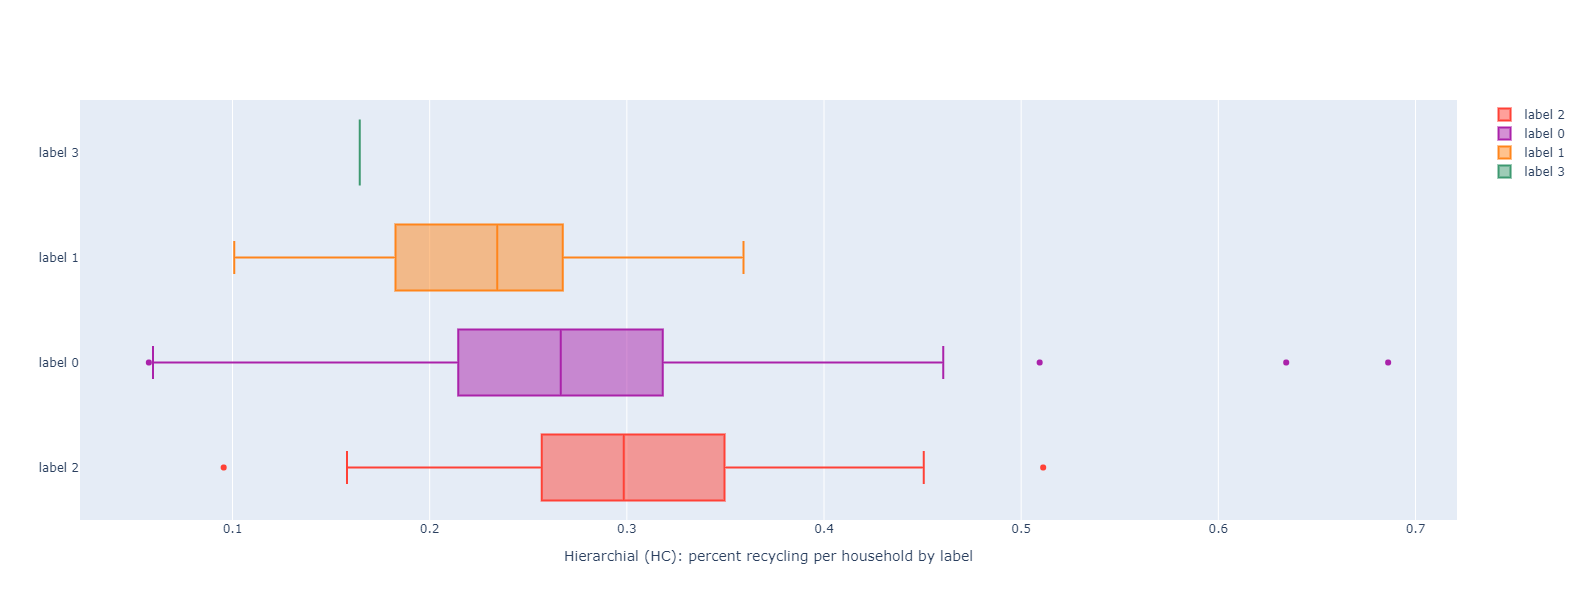

In [24]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)


fig.add_trace(go.Box(
    x=hc_label2['%recycle/hh'],
    name='label 2',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=hc_label0['%recycle/hh'],
    name='label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=hc_label1['%recycle/hh'],
    name='label 1',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=hc_label3['%recycle/hh'],
    name='label 3',
    marker_color='#3D9970'
))


fig.update_layout(
    xaxis=dict(title='Hierarchial (HC): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

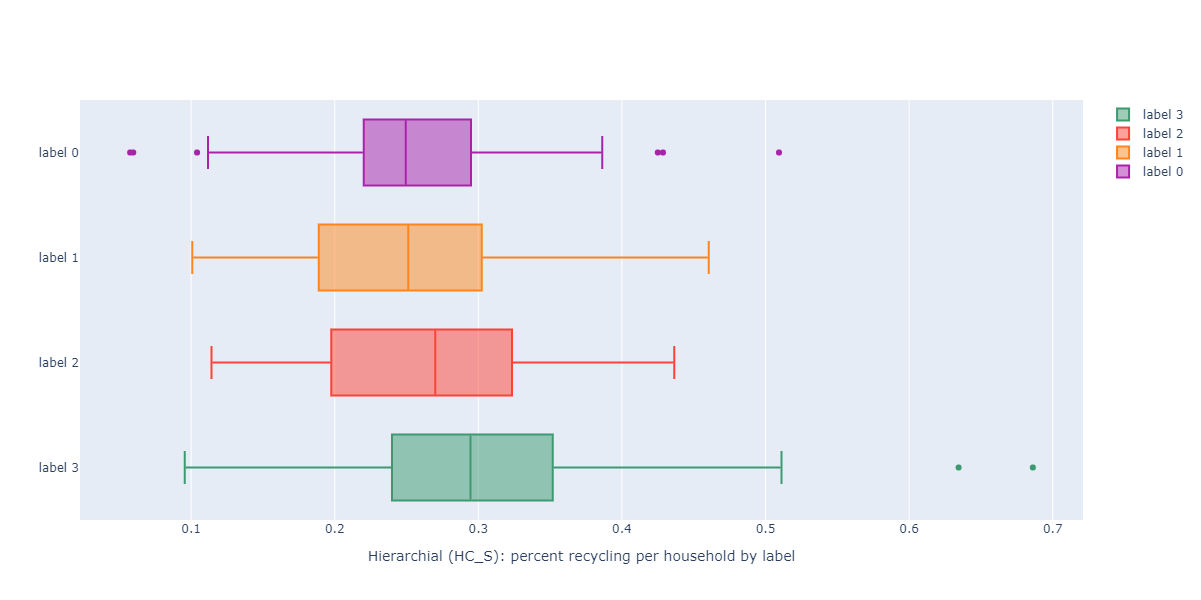

In [25]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)



fig.add_trace(go.Box(
    x=hc_s_label3['%recycle/hh'],
    name='label 3',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=hc_s_label2['%recycle/hh'],
    name='label 2',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=hc_s_label1['%recycle/hh'],
    name='label 1',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=hc_s_label0['%recycle/hh'],
    name='label 0',
    marker_color='#AA22AA'
))

fig.update_layout(
    xaxis=dict(title='Hierarchial (HC_S): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

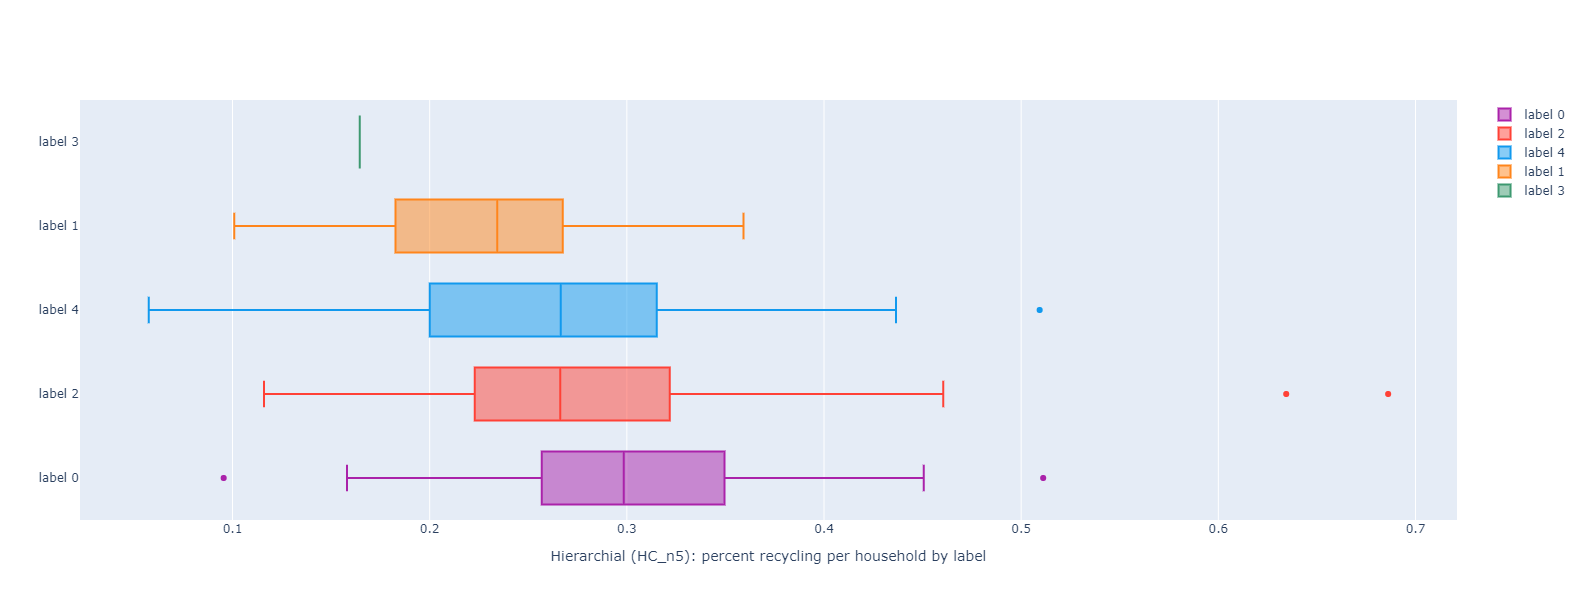

In [26]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)

fig.add_trace(go.Box(
    x=hc_n5_label0['%recycle/hh'],
    name='label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=hc_n5_label2['%recycle/hh'],
    name='label 2',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=hc_n5_label4['%recycle/hh'],
    name='label 4',
    marker_color='#1199ee'
))
fig.add_trace(go.Box(
    x=hc_n5_label1['%recycle/hh'],
    name='label 1',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=hc_n5_label3['%recycle/hh'],
    name='label 3',
    marker_color='#3D9970'
))


fig.update_layout(
    xaxis=dict(title='Hierarchial (HC_n5): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

The HC-scaled schema seems the least helpful; the medians are very close together (within 0.05 of each other) and even the fences are not very distingishable (they may span different lengths but label 3's fence spans the areas of all the other labels). The HC-n4 and HC-n5 schemes have better seperations in the medians. Not sure which is better--n4 or n5--because the trends of fences are fairly similar.

Note: the one solo label (label 3) in these two schemems is Boston.

### kMeans

KM clustering schema:
* `km_label` -- un-trimmed, un-scaled, n = 6
* `km_trimmed_label` -- trimmed, un-scaled, n = 6
* `km_s_label` -- trimmed, scaled, n = 6
* `km_n4_label` -- trimmed, un-scaled, n = 4
* `km_n5_label` -- trimmed, un-scaled, n = 5

In [27]:
km_label0 = waste_w_labels[waste_w_labels['km_label'] == 0]
km_label1 = waste_w_labels[waste_w_labels['km_label'] == 1]
km_label2 = waste_w_labels[waste_w_labels['km_label'] == 2]
km_label3 = waste_w_labels[waste_w_labels['km_label'] == 3]
km_label4 = waste_w_labels[waste_w_labels['km_label'] == 4]
km_label5 = waste_w_labels[waste_w_labels['km_label'] == 5]

In [28]:
km_trimmed_label0 = waste_w_labels[waste_w_labels['km_trimmed_label'] == 0]
km_trimmed_label1 = waste_w_labels[waste_w_labels['km_trimmed_label'] == 1]
km_trimmed_label2 = waste_w_labels[waste_w_labels['km_trimmed_label'] == 2]
km_trimmed_label3 = waste_w_labels[waste_w_labels['km_trimmed_label'] == 3]
km_trimmed_label4 = waste_w_labels[waste_w_labels['km_trimmed_label'] == 4]
km_trimmed_label5 = waste_w_labels[waste_w_labels['km_trimmed_label'] == 5]

In [29]:
km_s_label0 = waste_w_labels[waste_w_labels['km_s_label'] == 0]
km_s_label1 = waste_w_labels[waste_w_labels['km_s_label'] == 1]
km_s_label2 = waste_w_labels[waste_w_labels['km_s_label'] == 2]
km_s_label3 = waste_w_labels[waste_w_labels['km_s_label'] == 3]
km_s_label4 = waste_w_labels[waste_w_labels['km_s_label'] == 4]
km_s_label5 = waste_w_labels[waste_w_labels['km_s_label'] == 5]

In [30]:
km_n4_label0 = waste_w_labels[waste_w_labels['km_n4_label'] == 0]
km_n4_label1 = waste_w_labels[waste_w_labels['km_n4_label'] == 1]
km_n4_label2 = waste_w_labels[waste_w_labels['km_n4_label'] == 2]
km_n4_label3 = waste_w_labels[waste_w_labels['km_n4_label'] == 3]

In [31]:
km_n5_label0 = waste_w_labels[waste_w_labels['km_n5_label'] == 0]
km_n5_label1 = waste_w_labels[waste_w_labels['km_n5_label'] == 1]
km_n5_label2 = waste_w_labels[waste_w_labels['km_n5_label'] == 2]
km_n5_label3 = waste_w_labels[waste_w_labels['km_n5_label'] == 3]
km_n5_label4 = waste_w_labels[waste_w_labels['km_n5_label'] == 4]

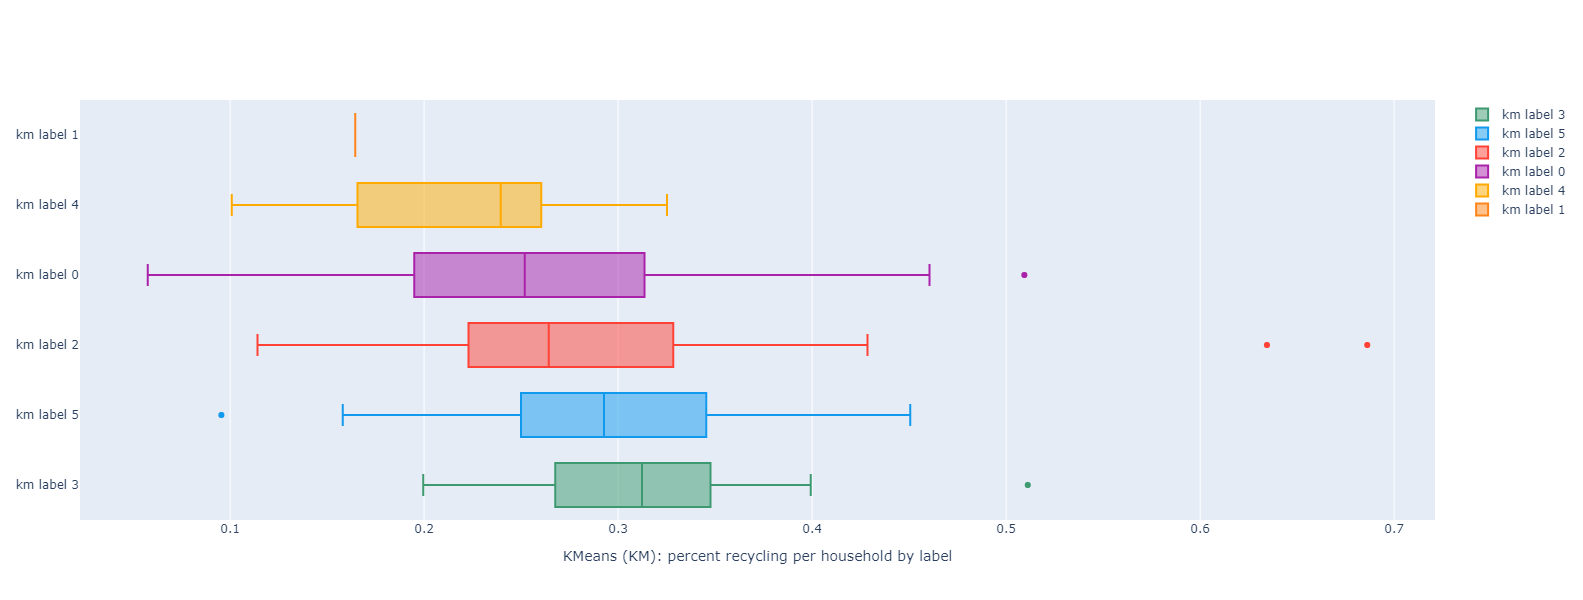

In [47]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)

fig.add_trace(go.Box(
    x=km_label3['%recycle/hh'],
    name='km label 3',
    marker_color='#3D9970'
))

fig.add_trace(go.Box(
    x=km_label5['%recycle/hh'],
    name='km label 5',
    marker_color='#1199ee'
))
fig.add_trace(go.Box(
    x=km_label2['%recycle/hh'],
    name='km label 2',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=km_label0['%recycle/hh'],
    name='km label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=km_label4['%recycle/hh'],
    name='km label 4',
    marker_color='#ffaa00'
))
fig.add_trace(go.Box(
    x=km_label1['%recycle/hh'],
    name='km label 1',
    marker_color='#FF851B'
))

fig.update_layout(
    xaxis=dict(title='KMeans (KM): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

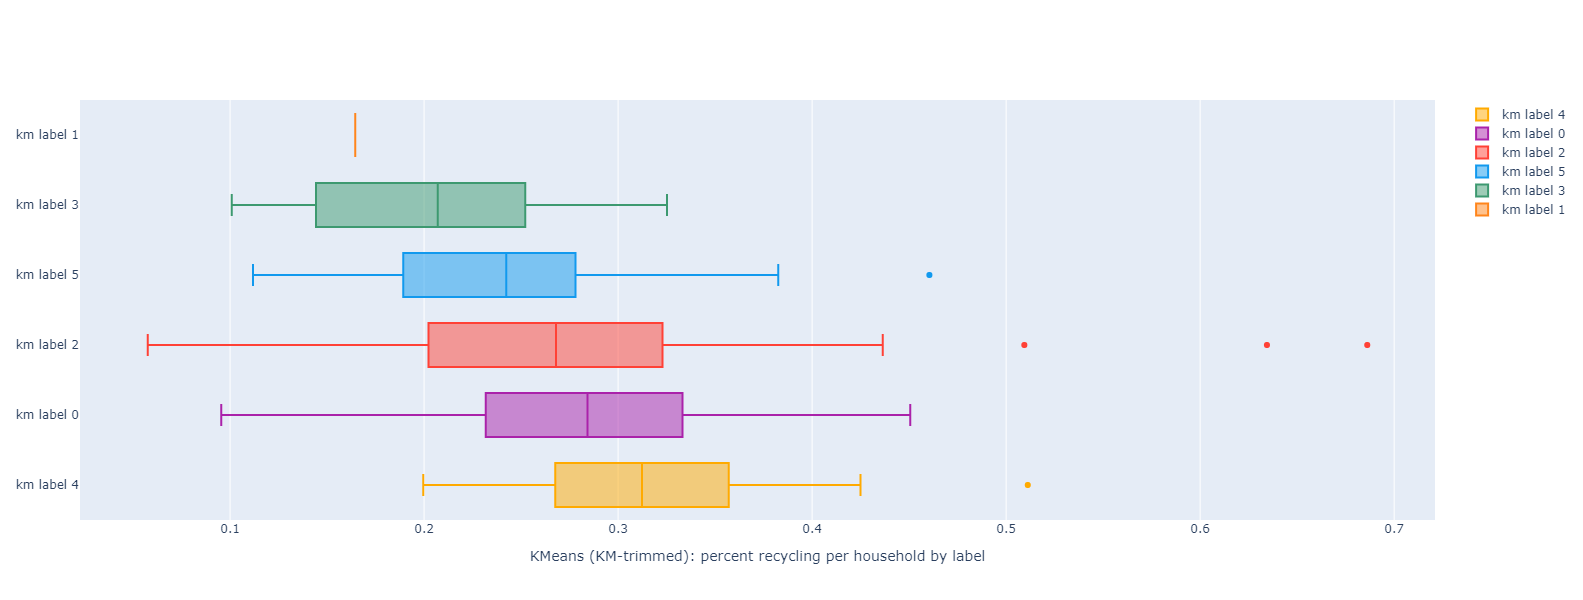

In [49]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)

fig.add_trace(go.Box(
    x=km_trimmed_label4['%recycle/hh'],
    name='km label 4',
    marker_color='#ffaa00'
))
fig.add_trace(go.Box(
    x=km_trimmed_label0['%recycle/hh'],
    name='km label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=km_trimmed_label2['%recycle/hh'],
    name='km label 2',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=km_trimmed_label5['%recycle/hh'],
    name='km label 5',
    marker_color='#1199ee'
))
fig.add_trace(go.Box(
    x=km_trimmed_label3['%recycle/hh'],
    name='km label 3',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=km_trimmed_label1['%recycle/hh'],
    name='km label 1',
    marker_color='#FF851B'
))

fig.update_layout(
    xaxis=dict(title='KMeans (KM-trimmed): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

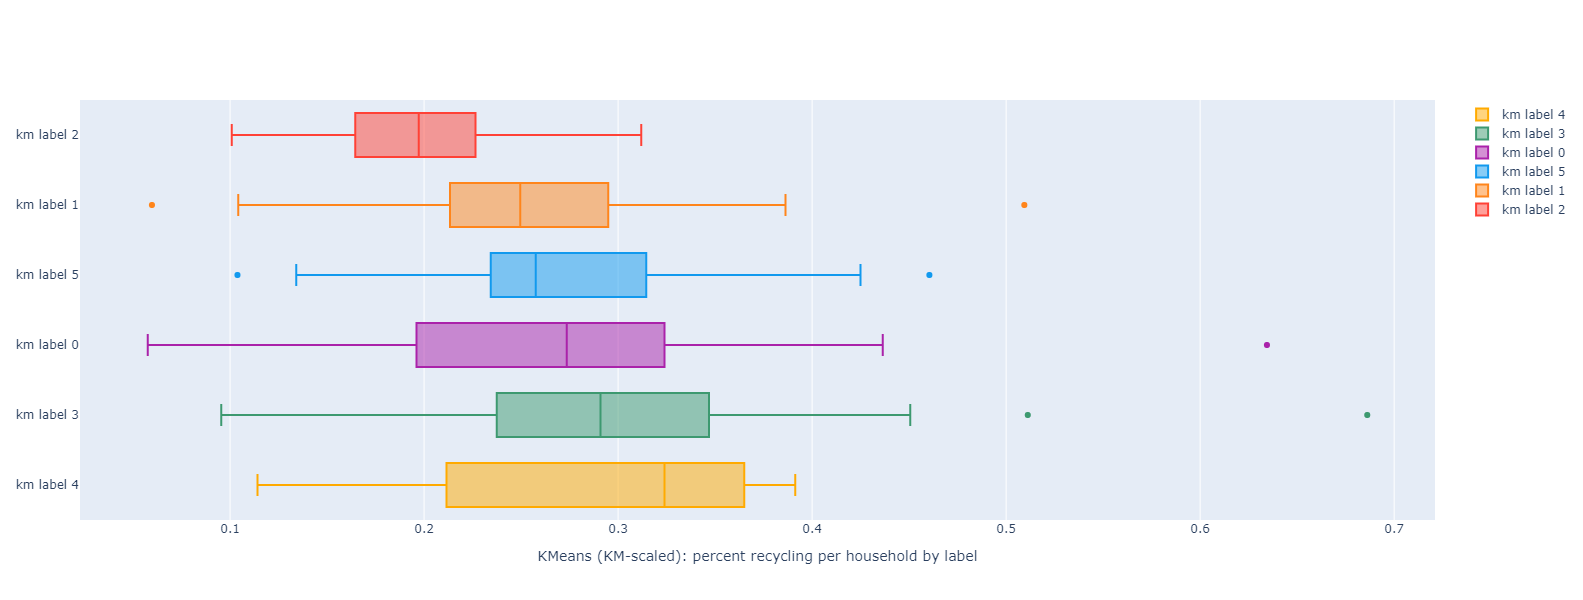

In [55]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)

fig.add_trace(go.Box(
    x=km_s_label4['%recycle/hh'],
    name='km label 4',
    marker_color='#ffaa00'
))
fig.add_trace(go.Box(
    x=km_s_label3['%recycle/hh'],
    name='km label 3',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=km_s_label0['%recycle/hh'],
    name='km label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=km_s_label5['%recycle/hh'],
    name='km label 5',
    marker_color='#1199ee'
))
fig.add_trace(go.Box(
    x=km_s_label1['%recycle/hh'],
    name='km label 1',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=km_s_label2['%recycle/hh'],
    name='km label 2',
    marker_color='#FF4136'
))

fig.update_layout(
    xaxis=dict(title='KMeans (KM-scaled): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

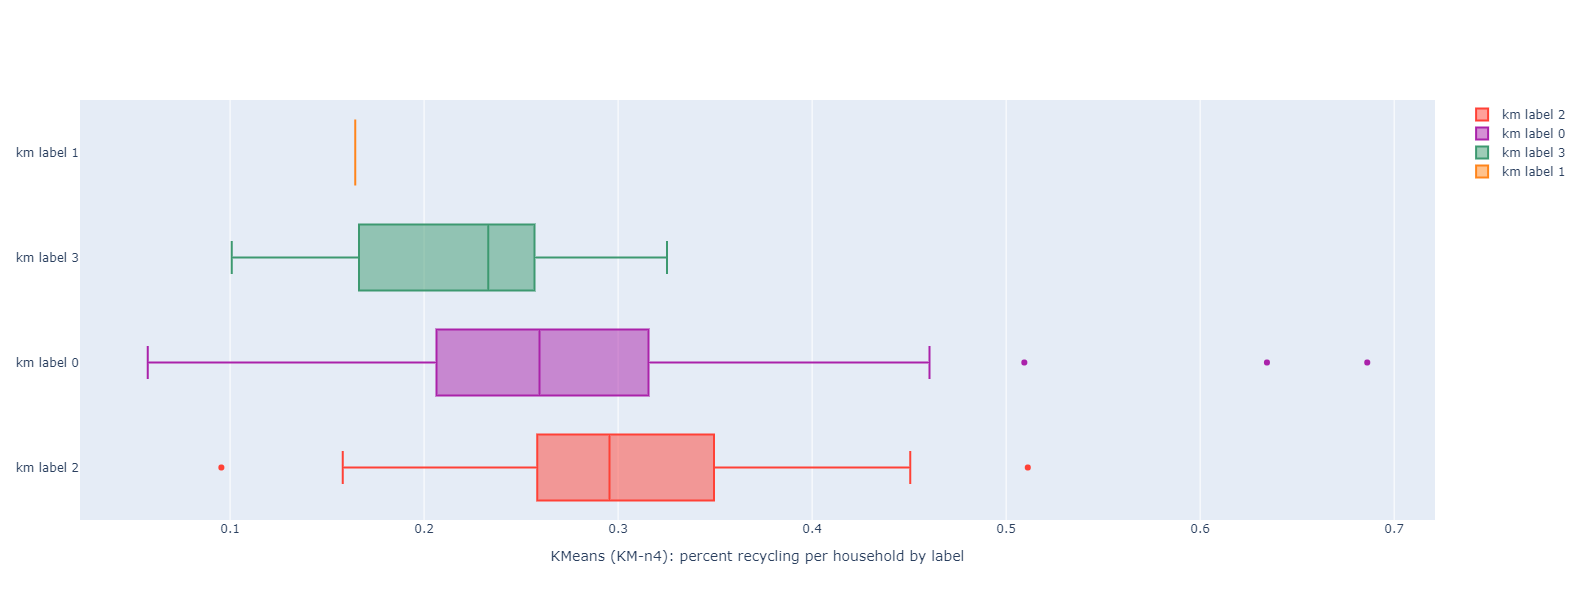

In [61]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)


fig.add_trace(go.Box(
    x=km_n4_label2['%recycle/hh'],
    name='km label 2',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=km_n4_label0['%recycle/hh'],
    name='km label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=km_n4_label3['%recycle/hh'],
    name='km label 3',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=km_n4_label1['%recycle/hh'],
    name='km label 1',
    marker_color='#FF851B'
))

fig.update_layout(
    xaxis=dict(title='KMeans (KM-n4): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

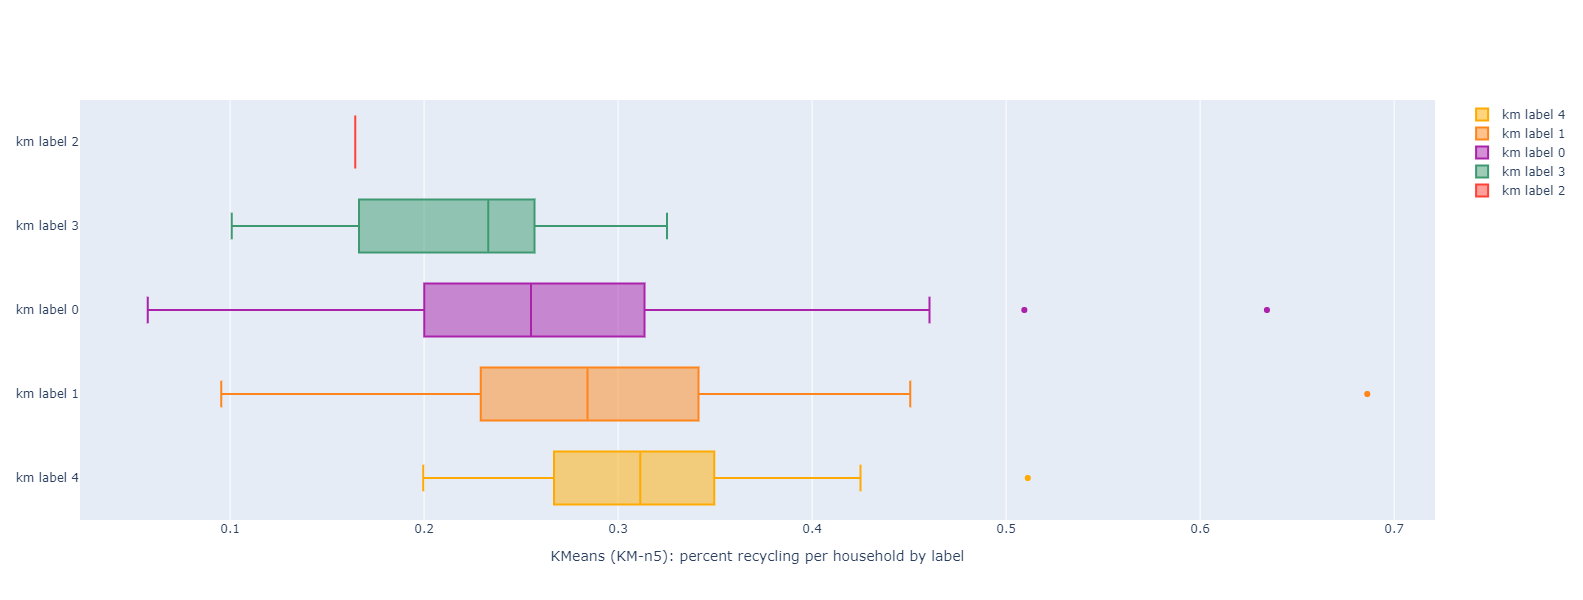

In [62]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)

fig.add_trace(go.Box(
    x=km_n5_label4['%recycle/hh'],
    name='km label 4',
    marker_color='#ffaa00'
))
fig.add_trace(go.Box(
    x=km_n5_label1['%recycle/hh'],
    name='km label 1',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=km_n5_label0['%recycle/hh'],
    name='km label 0',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=km_n5_label3['%recycle/hh'],
    name='km label 3',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=km_n5_label2['%recycle/hh'],
    name='km label 2',
    marker_color='#FF4136'
))

fig.update_layout(
    xaxis=dict(title='KMeans (KM-n5): percent recycling per household by label', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

Again, the scaled data as muddled fences. Can't say if the un-trimmed data is better or worse than the trimmed data in any discernable way, although it does seem like the trimmed data has distributions which are less skewed. I'm dubious of the n4 and n5 schemes because in both cases, one label encompasses all the labels' fences.

So far, I think I like the Hierarchial-n5 schema best for hierarchial clustering and KMeans-trimmed or n5 best for KMeans clustering

### Are the clusters statistically different?

I want to assess clustering schemes by whether the individual labels' distributions for `%recycle/hh` are statistically different from the other labels in the same schema. I can get a sort of sense for it in box plot overlays but statistical testing would be more precise. Because the variances are very different and the distributions are probably not normal, I'm going to use the Mann-Whitney u test. I'll choose a confidence interval of 90% as this is still probably more than high enough for recycling application.

Even if the clusters are not statistically different, it may still be worth assessing their predictive trends.

In [69]:
from scipy.stats import mannwhitneyu
import numpy as np

In [77]:
# function to determine statistical differences within labels

def stat_difference(label_type, n):
    mwu_res = pd.DataFrame(np.full((n-1, n-1), False))
    for i in mwu_res.columns:
        for j in mwu_res.index:
            if i == j:
                continue
            exec(f"if mannwhitneyu({label_type}{i}['%recycle/hh'], {label_type}{j}['%recycle/hh'], alternative='two-sided')[1] < 0.10: mwu_res.at[j,i] = True")
    return mwu_res

In [ ]:
# colors "true" values to make the table more readable
def color_true_red(val):
    color = 'red' if val == True else 'black'
    return 'color: {}'.format(color)

#### KMeans schemes

In [82]:
stat_difference('km_label', 6).style.applymap(color_true_red)

,0,1,2,3,4
0,False,False,False,True,True
1,False,False,False,False,False
2,False,False,False,True,True
3,True,False,True,False,True
4,True,False,True,True,False


In [83]:
stat_difference('km_trimmed_label', 6).style.applymap(color_true_red)

,0,1,2,3,4
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,True
3,True,False,True,False,True
4,False,False,True,True,False


In [84]:
stat_difference('km_s_label', 6).style.applymap(color_true_red)

,0,1,2,3,4
0,False,False,True,False,False
1,False,False,True,True,False
2,True,True,False,True,False
3,False,True,True,False,False
4,False,False,False,False,False


In [86]:
stat_difference('km_n4_label', 4).style.applymap(color_true_red)

,0,1,2
0,False,False,True
1,False,False,False
2,True,False,False


In [87]:
stat_difference('km_n5_label', 5).style.applymap(color_true_red)

,0,1,2,3
0,False,True,False,True
1,True,False,False,True
2,False,False,False,False
3,True,True,False,False


#### Hierarchial Schemes

In [88]:
stat_difference('hc_label', 4).style.applymap(color_true_red)

,0,1,2
0,False,True,True
1,True,False,True
2,True,True,False


In [89]:
stat_difference('hc_s_label', 4).style.applymap(color_true_red)

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,False


In [91]:
stat_difference('hc_n5_label', 5).style.applymap(color_true_red)

,0,1,2,3
0,False,True,True,False
1,True,False,True,False
2,True,True,False,False
3,False,False,False,False


KM clustering schema statistical differences:
* `km_label` -- 5 out of 10 combinations are different (50%)
* `km_trimmed_label` -- 4 out of 10 combinations are different (40%)
* `km_s_label` -- 4 out of 10 combinations are different (40%)
* `km_n4_label` -- 1 out of 3 combinations are different (~33%)
* `km_n5_label` -- 3 out of 6 combinations are different (50%)

Hierarchial clustering schema statistical differences:
* `hc_label` -- 3 out of 3 combinations are different (100%)
* `hc_s_label` -- 0 out of 3 combinations are different (0%)
* `hc_n5_label` -- 3 out of 6 combinations are different (50%)

I'm actually shocked by the hierarchial statistical performance! I think because of it's statistical differences, I'll go with the base HC schema (which has n=4). At the moment, I can't think of any reason to also look at another schema, although I maintain that it is O.K. if the labels aren't statistically different from each other when it comes to recycle rates, because ultimately I'm looking for trends.

In [94]:
# from Part 2 + hc_label
cols_to_include = ['edu_high_school_and_higher_%', 'unemployment_rate_%', 'median_household_income', 'people_below_poverty_level_%', 'occupancy_%', '1-unit_attached_%', '2-units_%', '3-4_units_%', '5-9_units_%',
 '10-19_units_%', '20+_units_%', 'KEY_total_population', 'median_age', 'demo_black_aa_%', 'demo_american_indian_%', 'demo_asian_%', 'demo_native_islander%', 'demo_hispanic_latino_%', 'rep%', 'un%', 'total_waste/hh',
 'hc_label']

In [96]:
hc_schema = cluster[cols_to_include]

In [97]:
population_stats = hc_schema.describe().T

stats0 = hc_schema[hc_schema['hc_label'] == 0].describe().T
stats1 = hc_schema[hc_schema['hc_label'] == 1].describe().T
stats2 = hc_schema[hc_schema['hc_label'] == 2].describe().T
stats3 = hc_schema[hc_schema['hc_label'] == 3].describe().T

In [100]:
d = 25

In [112]:
sub0 = 100*(stats0 - population_stats ) / population_stats

sub0.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub0[(abs(sub0['mean']) > d) | (abs(sub0['25%']) > d) | (abs(sub0['50%']) > d) | (abs(sub0['75%']) > d)]

,mean,25%,50%,75%
1-unit_attached_%,-9.298822,-31.428571,-17.948718,-3.333333
5-9_units_%,-5.319994,-33.333333,-10.000000,0.000000
20+_units_%,-29.755975,-100.000000,-48.484848,-19.298246
KEY_total_population,-54.850935,-33.607521,-40.389846,-37.353492
demo_black_aa_%,-26.619196,-31.578947,-11.538462,-21.052632
demo_asian_%,-38.088004,-50.000000,-32.142857,-38.842975
demo_native_islander%,-11.147541,NaN,NaN,-33.333333
demo_hispanic_latino_%,-32.321717,-19.354839,-12.500000,-23.200000
hc_label,-100.000000,NaN,NaN,-100.000000


In [113]:
sub1 = 100*(stats1 - population_stats) / population_stats

sub1.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub1[(abs(sub1['mean']) > d) | (abs(sub1['25%']) > d) | (abs(sub1['50%']) > d) | (abs(sub1['75%']) > d)]

,mean,25%,50%,75%
unemployment_rate_%,25.085236,33.333333,30.000000,17.647059
people_below_poverty_level_%,73.439086,120.512821,98.412698,63.350785
1-unit_attached_%,25.726257,122.857143,43.589744,3.333333
2-units_%,94.749838,263.265306,133.333333,54.368932
3-4_units_%,114.607606,396.969697,181.395349,72.916667
5-9_units_%,77.875451,350.000000,90.000000,51.724138
10-19_units_%,90.268162,inf,200.000000,29.347826
20+_units_%,158.270432,2457.142857,303.030303,95.321637
KEY_total_population,238.718938,1646.866432,553.184497,262.162217
demo_black_aa_%,178.599836,526.315789,203.846154,124.210526


In [114]:
sub2 = 100*(stats2 - population_stats) / population_stats

sub2.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub2[(abs(sub2['mean']) > d) | (abs(sub2['25%']) > d) | (abs(sub2['50%']) > d) | (abs(sub2['75%']) > d)]

,mean,25%,50%,75%
median_household_income,60.135200,87.525020,59.358813,52.126205
people_below_poverty_level_%,-52.822834,-32.051282,-51.587302,-57.068063
1-unit_attached_%,14.524616,58.571429,2.564103,5.416667
2-units_%,-51.081662,-56.122449,-56.140351,-62.378641
3-4_units_%,-53.236445,-19.696970,-46.511628,-62.239583
5-9_units_%,-37.233115,-13.888889,-45.000000,-38.362069
10-19_units_%,-29.848779,inf,-41.176471,-54.347826
20+_units_%,-8.836990,357.142857,19.696970,-13.742690
KEY_total_population,-29.508724,115.990991,41.693110,-6.651880
demo_black_aa_%,-38.803346,-26.315789,-34.615385,-36.315789


In [116]:
sub3 = 100*(stats3 - population_stats) / population_stats

sub3 = sub3['mean']
sub3[(abs(sub3) > d)]

unemployment_rate_%               56.018842
people_below_poverty_level_%     151.987602
1-unit_attached_%                 45.985464
2-units_%                         88.948436
3-4_units_%                      284.622603
5-9_units_%                      184.040019
10-19_units_%                    184.873720
20+_units_%                      365.401846
KEY_total_population            3217.011939
median_age                       -28.287435
demo_black_aa_%                  638.092545
demo_asian_%                     128.304858
demo_native_islander%             83.728814
demo_hispanic_latino_%           261.796238
rep%                             -49.012230
un%                              -29.701686
hc_label                         472.535211
Name: mean, dtype: float64

Label 0 is lower population with mostly one-family detached homes and mainly white people.

Label 1 is very large populations with a high concentration of multi-unit residences (especially highly dense ones), economically instable, extreme ethnic diversity in almost every ethnicity except for American Indians and highly democratic.

Label 2 is mid-range population with mostly one-family homes (both detatched and attached), economically stable, very white and Asian.

Label 3 is Boston. Population and poverty is a lot higher than any of the others and it is much more ethnically diverse and democratic.

## Comparing predictive models of the population and the clusters

Next step is to see if:

1. we can get better predictions within the clusters than within the population as a whole 
2. the trends within the clusters are significantly different (e.g. feature1 is has a positive correlation with recycling rate in cluster0 but a negative correlation in cluster2)

#### Forming a baseline regression for the population

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [92]:
fit_results = {}

def fit_model(model, name):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    fit_results[name] = (score, rmse)
    return score

In [95]:
model1 = LinearRegression(n_jobs=-1)
fit_model(model1, 'model1')

0.32986153113485017

In [98]:
model4 = BaggingRegressor(n_jobs=-1, n_estimators=1000)
fit_model(model4, 'model4')

0.30167975245385636

In [100]:
model6 = make_pipeline(StandardScaler(),Ridge())
fit_model(model6, 'model6')

0.3324299353769965

In [124]:
model8 = make_pipeline(StandardScaler(), RFE(Ridge(), n_features_to_select=11), LinearRegression())
fit_model(model8, 'model8')

0.3729588023233261

In [130]:
model9 = make_pipeline(StandardScaler(), RFE(LinearRegression(), n_features_to_select=6), LinearRegression())
fit_model(model9, 'model9')

0.3871091959630314

In [134]:
vr11 = VotingRegressor([('lr_w_rfe', model8), ('bagging', model4)])
fit_model(vr11, 'vr_w_bagging_and_lr_w_ridge_RFE')

0.4029176156040116

In [204]:
rfe_lr_lr_coefs = pd.Series(data= model9.named_steps['linearregression'].coef_, index = X.columns[model9.named_steps['rfe'].support_], name= 'rfe_lr_lr')

In [205]:
rfe_ridge_lr_coefs = pd.Series(data= model8.named_steps['linearregression'].coef_, index = X.columns[model8.named_steps['rfe'].support_], name='rfe_ridge_lr')

In [214]:
bagging_coefs = np.mean([
    tree.feature_importances_ for tree in model4.estimators_
], axis=0)
# model4.estimators_[0].feature_importances_

In [216]:
model_coefs = pd.DataFrame(data={'plain_linreg':model1.coef_, 'plain_ridge':model6.named_steps['ridge'].coef_, "bagging":bagging_coefs},index=X.columns)

In [217]:
model_coefs = model_coefs.merge(rfe_lr_lr_coefs,how = 'left',left_index=True,right_index=True)

In [218]:
model_coefs = model_coefs.merge(rfe_ridge_lr_coefs,how = 'left',left_index=True,right_index=True)

In [220]:
model_coefs = model_coefs.fillna(0)

In [221]:
model_coefs['voting_reg_bag_w_rfe_lr_lr'] = (model_coefs['bagging'] + model_coefs['rfe_lr_lr']) / 2

In [222]:
model_coefs

,plain_linreg,plain_ridge,bagging,rfe_lr_lr,rfe_ridge_lr,voting_reg_bag_w_rfe_lr_lr
Solid Waste program funded by property tax?,-1.592003e-02,-0.007261,0.007105,0.000000,0.000000,0.003553
Solid Waste program funded by transfer station access fee?,-4.668399e-03,-0.002235,0.007623,0.000000,0.000000,0.003812
What is the annual fee?,-9.340426e-05,-0.007722,0.034452,0.000000,0.000000,0.017226
What is the transfer station access fee?,-6.558741e-05,-0.002474,0.043013,0.000000,0.000000,0.021507
What is the per-visit fee?,8.376223e-04,0.003916,0.012936,0.000000,0.000000,0.006468
PAYT/ SMART,4.733047e-02,0.023733,0.156526,0.029383,0.028820,0.092955
Municipal Buildings Trash and Recycling Service_Both,-5.003499e-02,-0.012405,0.014728,0.000000,0.000000,0.007364
Municipal Buildings Trash and Recycling Service_Recycling,-5.433023e-02,-0.009603,0.002257,0.000000,0.000000,0.001129
Municipal Buildings Trash and Recycling Service_Trash,3.702802e-13,0.000000,0.000000,0.000000,0.000000,0.000000
School Trash and Recycling Service_Both,-6.874719e-03,-0.003403,0.008885,0.000000,0.000000,0.004442


In [ ]:
# For saving files

# summary19.to_csv(data/census_data/musum19.csv, index=True)